![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.

---

## 1. Introducción

## 2. Carga de datos Análisis Exploratorio de Datos

### 2.1. Carga de datos

In [94]:
!pip install lightgbm
!pip install xgboost

In [127]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

# Funciones de Pipeline y Transformers (SkLearn)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer, FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as ltb
import xgboost as xgb

In [96]:
df = pd.read_parquet('dataset.pq')
df.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


### 2.2. Análisis exploratorio

In [97]:
print("Número de filas y columnas: ", df.shape)

Número de filas y columnas:  (12500, 22)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

In [99]:
df.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score
count,12500.000000,1.250000e+04,10584.000000,12500.000000,12500.000000,12500.000000,12500.000000,12500.000000,11660.00000,12246.000000,12243.000000,12500.000000,12500.000000,11380.000000,12500.000000,11914.000000,1.214500e+04,12500.000000
mean,105.771840,1.616206e+05,4186.634963,16.939920,23.172720,73.213360,3.099440,21.060880,32.93542,10.398582,26.292330,1426.220376,32.349265,18.230404,1488.394291,638.798715,-2.744614e+22,0.288160
std,664.502705,1.297842e+06,3173.690362,114.350815,132.005866,468.682227,65.105277,14.863091,237.43768,6.799253,181.821031,1155.169458,5.156815,8.302078,8561.449910,2049.195193,3.024684e+24,0.452924
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,-100.000000,-5.000000,-3.00000,-6.490000,0.000000,0.230000,20.100770,0.000000,0.000000,0.000000,-3.333333e+26,0.000000
25%,25.000000,1.945333e+04,1622.408646,3.000000,4.000000,8.000000,1.000000,10.000000,9.00000,5.370000,4.000000,566.072500,28.066517,12.000000,31.496968,73.736810,2.701501e+02,0.000000
50%,33.000000,3.757238e+04,3087.595000,6.000000,5.000000,14.000000,3.000000,18.000000,14.00000,9.410000,6.000000,1166.155000,32.418953,18.000000,72.887628,134.093193,3.393885e+02,0.000000
75%,42.000000,7.269021e+04,5967.937500,7.000000,7.000000,20.000000,5.000000,28.000000,18.00000,14.940000,10.000000,1945.962500,36.623650,25.000000,169.634826,261.664256,4.714245e+02,1.000000
max,8678.000000,2.383470e+07,15204.633333,1756.000000,1499.000000,5789.000000,1495.000000,67.000000,4293.00000,36.970000,2554.000000,4998.070000,48.199824,33.000000,81971.000000,10000.000000,1.463792e+03,1.000000


In [100]:
# Porcentaje de valores nulos
df.isna().sum() / df.shape[0]

customer_id                 0.00000
age                         0.00000
occupation                  0.00000
annual_income               0.00000
monthly_inhand_salary       0.15328
num_bank_accounts           0.00000
num_credit_card             0.00000
interest_rate               0.00000
num_of_loan                 0.00000
delay_from_due_date         0.00000
num_of_delayed_payment      0.06720
changed_credit_limit        0.02032
num_credit_inquiries        0.02056
outstanding_debt            0.00000
credit_utilization_ratio    0.00000
credit_history_age          0.08960
payment_of_min_amount       0.00000
total_emi_per_month         0.00000
amount_invested_monthly     0.04688
payment_behaviour           0.00000
monthly_balance             0.02840
credit_score                0.00000
dtype: float64

In [101]:
print(f'Cantidad de filas duplicadas: {df.duplicated().sum()}')

Cantidad de filas duplicadas: 0


El archivo `profile.html` muestra un análisis univariado de cada atributo del set de datos. Donde se puede observar lo siguiente:

### Distribución de las variables

* `monthly_inhand_salary`, `outstanding_debt`, `amount_invested_monthly` distribuye Log-normal
* `changed_credit_limit`, `credit_utilization_radio` se asemeja a una distribución Normal
* Mientras que el resto de variables no presenta una distribución conocida debido a lo que se puede apreciar en la forma de la distribución empírica dada por los histogramas del reporte.



C:\Users\carol\AppData\Local\Temp\ipykernel_4144\477394489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

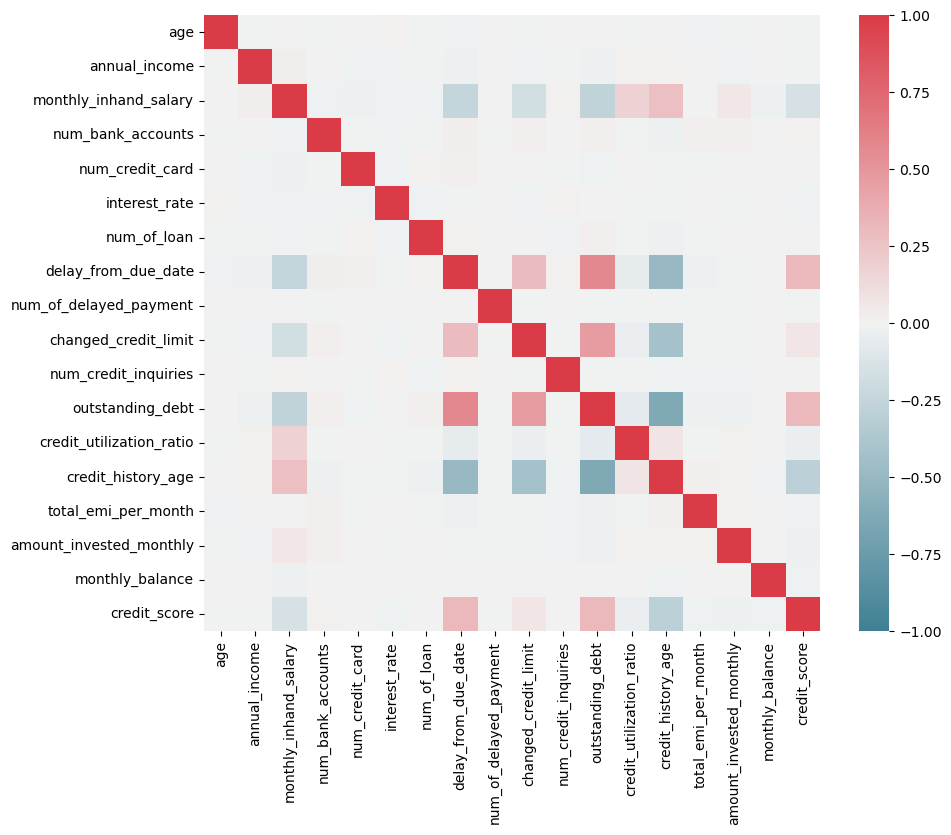

In [102]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [103]:
df.columns

Index(['customer_id', 'age', 'occupation', 'annual_income',
       'monthly_inhand_salary', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

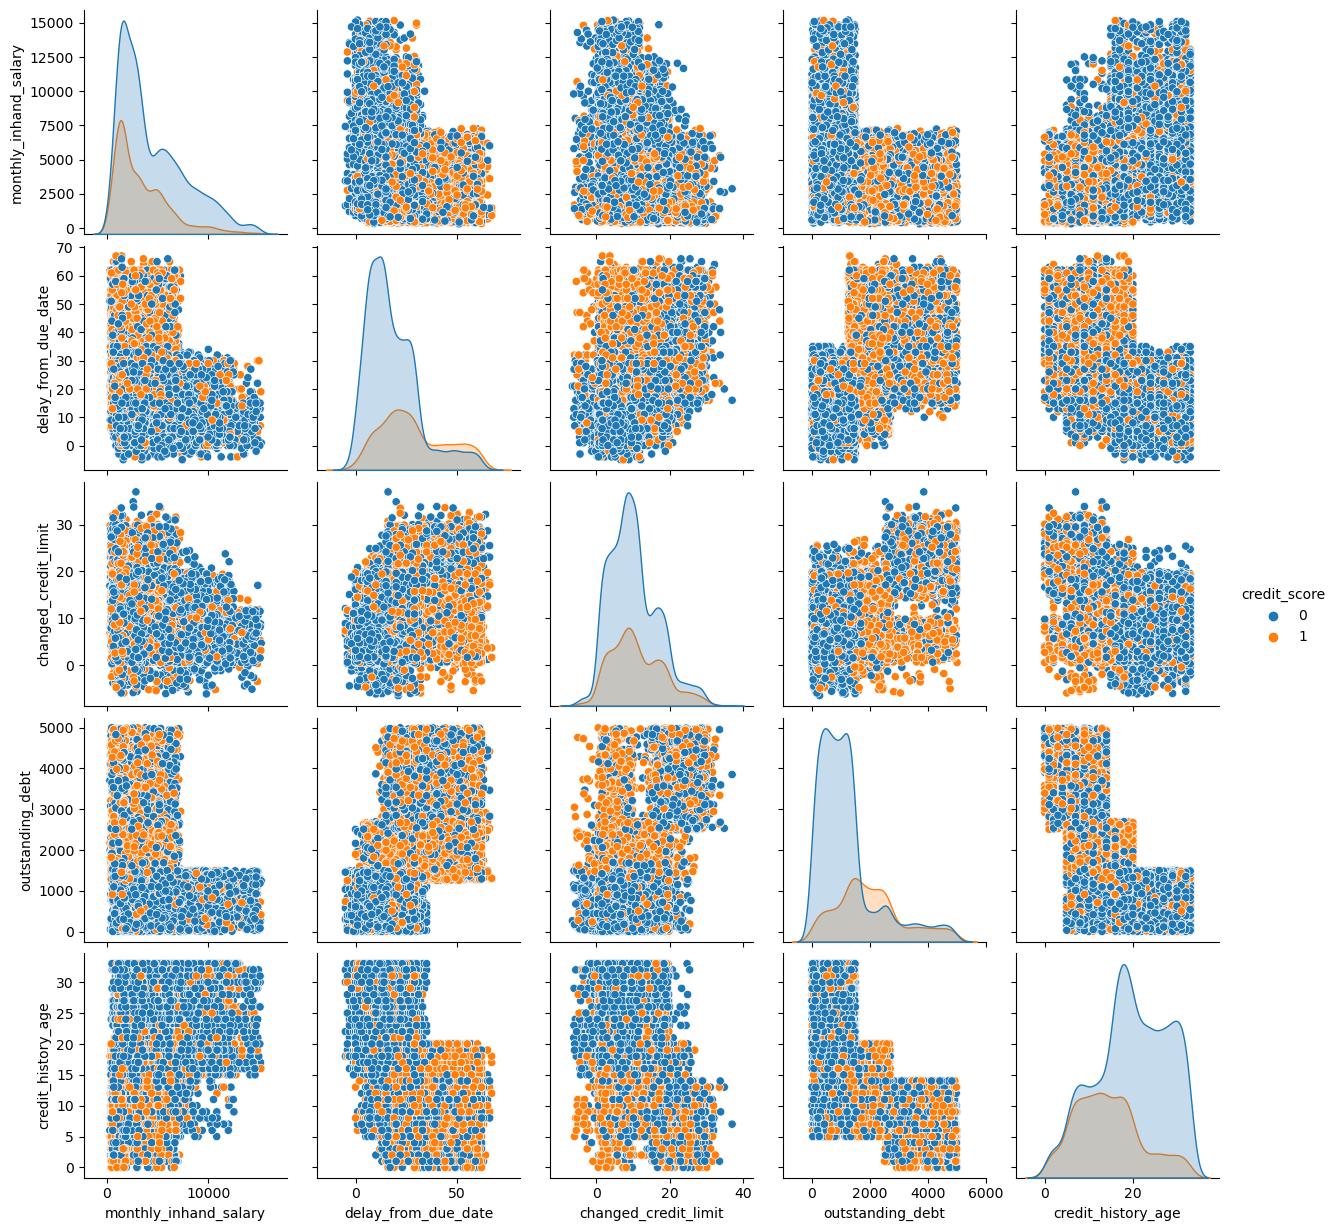

In [104]:
df_pp = df[["monthly_inhand_salary", 
            "delay_from_due_date",
            "changed_credit_limit",
            "outstanding_debt",
            "credit_history_age",
            "credit_score"]]

sns.pairplot(df_pp, hue="credit_score")

## 3. Preparación de Datos

### 3.1. Preprocesamiento

Convertir las columnas mal leidas a sus tipos correspondientes (float, str, etc...)

Genere un `ColumnTransformer` que:
  - Preprocese datos categóricos y ordinales.
  - Escale/estandarice datos numéricos.
  - Uitlice `.set_output(transform="pandas")` sobre su `ColumnTransformer` para setear el formato de salida a de las transformaciones a pandas.

In [105]:
# Columnas para transformar con OneHotEncoder
cols_to_oh = [
    'occupation',
    'payment_of_min_amount',
    'payment_behaviour'
]

cols_minmax = [
    'age',
    'annual_income',
    'monthly_inhand_salary',
    'num_bank_accounts',
    'num_credit_card',
    'interest_rate',
    'num_of_loan',
    'num_of_delayed_payment',
    'num_credit_inquiries',
    'outstanding_debt',
    'credit_history_age',
    'total_emi_per_month',
    'amount_invested_monthly',
    'monthly_balance'
]

cols_standard = [
    'delay_from_due_date',
    'changed_credit_limit',
    'credit_utilization_ratio'
]

# Generamos el transformer de preprocesamiento
preprocessing_transformer = ColumnTransformer(
    transformers = [
        ('OneHotEncoder', OneHotEncoder(sparse_output=False), cols_to_oh),
        ('StandardScaler', StandardScaler(), cols_standard),
        ('MinMax', MinMaxScaler(), cols_minmax)
    ],
    remainder='passthrough'
).set_output(transform="pandas")

# Generamos el Pipeline que aplicará las transformaciones de preprocesamiento
# pipeline = Pipeline(
#     steps=[
#         preprocessing_transformer
#     ]
# ).set_output(transform="pandas")

In [106]:
df_preprocesado = preprocessing_transformer.fit_transform(df)
df_preprocesado

,OneHotEncoder__occupation_Accountant,OneHotEncoder__occupation_Architect,OneHotEncoder__occupation_Developer,OneHotEncoder__occupation_Doctor,OneHotEncoder__occupation_Engineer,OneHotEncoder__occupation_Entrepreneur,OneHotEncoder__occupation_Journalist,OneHotEncoder__occupation_Lawyer,OneHotEncoder__occupation_Manager,OneHotEncoder__occupation_Mechanic,...,MinMax__num_of_loan,MinMax__num_of_delayed_payment,MinMax__num_credit_inquiries,MinMax__outstanding_debt,MinMax__credit_history_age,MinMax__total_emi_per_month,MinMax__amount_invested_monthly,MinMax__monthly_balance,remainder__customer_id,remainder__credit_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.065204,0.002095,0.001566,0.162020,NaN,0.000605,0.002479,1.0,CUS_0xd40,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.063323,0.001629,0.000783,0.121012,0.818182,0.000230,0.021890,1.0,CUS_0x21b1,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.064577,0.002095,0.001175,0.260669,0.545455,0.003013,1.000000,1.0,CUS_0x2dbc,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.002793,0.001566,0.126501,0.515152,0.000200,0.012562,1.0,CUS_0xb891,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.004190,0.001566,0.188808,0.939394,0.000000,0.018133,1.0,CUS_0x1cdb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.063323,NaN,0.000392,0.215943,0.848485,0.000427,0.011518,NaN,CUS_0x372c,0
12496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.065204,0.000698,0.003132,0.179464,NaN,0.000502,0.007081,NaN,CUS_0xf16,0
12497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.064577,0.002793,0.001175,0.124136,0.909091,0.001027,0.004294,NaN,CUS_0xaf61,0
12498,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.065831,0.006518,0.003524,0.714603,0.181818,0.000744,0.003466,NaN,CUS_0x8600,0


### 3.2. Holdout

Para efectos del modelo de clasificación, se elimina el id del cliente, ya que no aporta a la generalización del algoritmo.

In [107]:
df.drop(columns=["customer_id"], inplace=True)

Se eliminan las filas que tienen valores nulos en ciertas columnas (más detalles en Parte 3.3).

In [ ]:
df.dropna(subset = ['changed_credit_limit', 'num_credit_inquiries', 'amount_invested_monthly', 'monthly_balance'], inplace=True)

In [108]:
y = df['credit_score']
X = df.drop(columns=['credit_score'])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### 3.3. Datos nulos

De acuerdo a los resultados del análisis exploratorio (Sección 2.2), las columnas que presentan datos nulos con su respectivo porcentaje son:

| Atributo                | Porcentaje de datos nulos |
|-------------------------|---------------------------|
| monthly_inhand_salary   | 15.3%                     |
| num_of_delayed_payment  | 6.7%                      |
| changed_credit_limit    | 2%                        |
| num_credit_inquiries    | 2%                        |
| credit_history_age      | 8.9%                      |
| amount_invested_monthly | 4.6%                      |
| monthly_balance         | 2.8%                      |

Por otro lado, se obtiene la cantidad de filas que contienen al menos un valor nulo.

In [110]:
df.isna().any(axis=1).sum()/ df.shape[0]

0.28067014952260855

Además, se genera una visualización Missigno sobre el dataframe.

<Axes: >

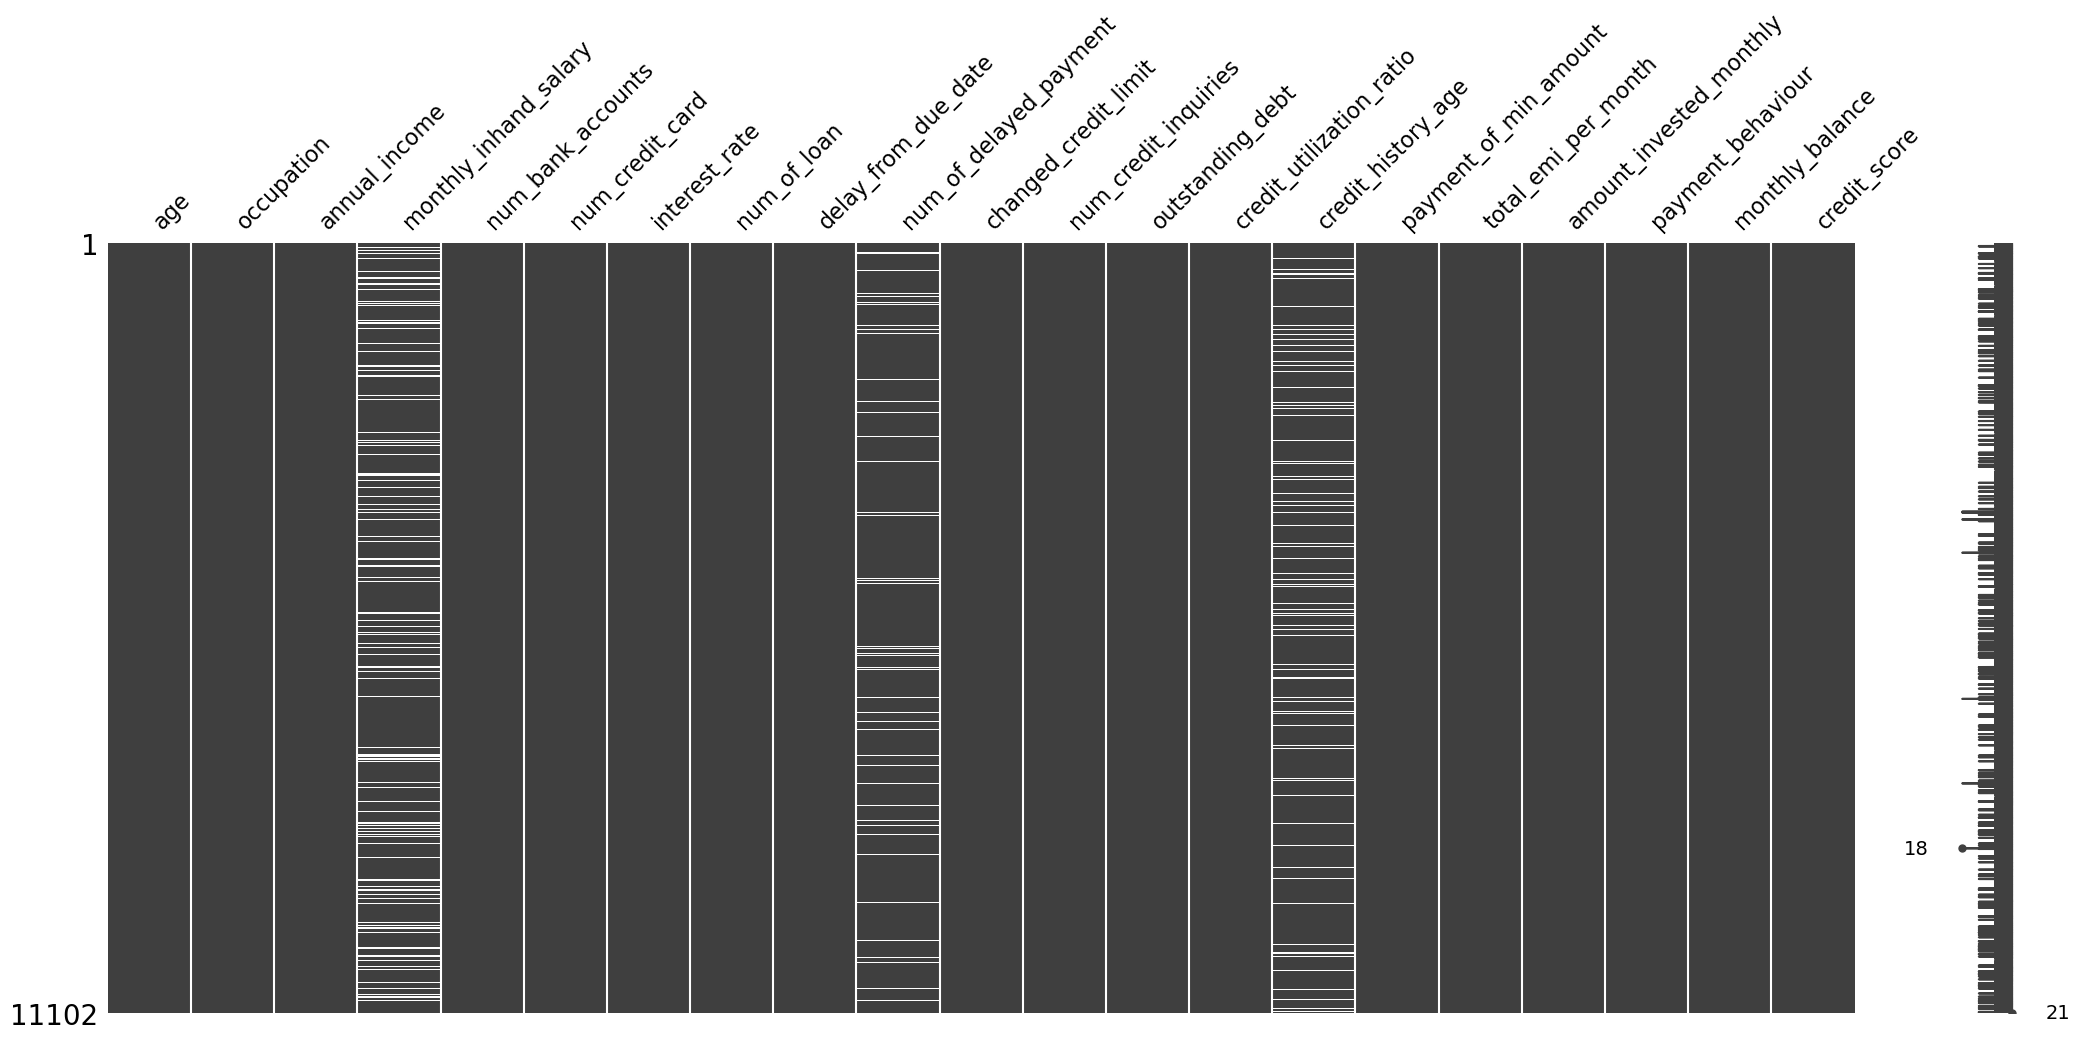

In [111]:
%matplotlib inline

msno.matrix(df)

A continuación, se detallan las acciones realizadas para cada atributo que presenta datos nulos:

* `monthly_inhand_salary`: Es una variable numérica continua que representa el salario mensual de una persona. Por lo tanto, esto podría aproximarse al ingreso anual (annual_income) dividido por 12.

<Axes: >

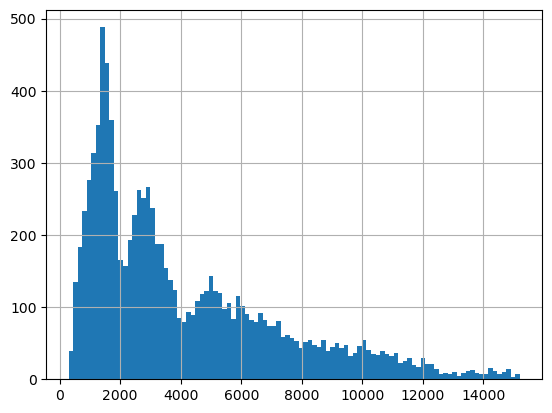

In [112]:
df['monthly_inhand_salary'].hist(bins = 100)

In [113]:
df['monthly_inhand_salary'] = df['monthly_inhand_salary'].fillna(df['annual_income']/12)
# df['monthly_inhand_salary'].hist(bins = 100)

* `num_of_delayed_payment`: Es una variable numérica continua que representa el promedio de la cantidad de pagos retrasados por el cliente. Y presenta muchos outliers, así que los datos nulos son reemplazados por la mediana.

<Axes: >

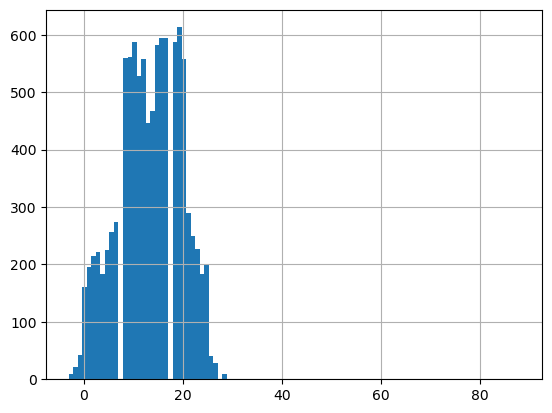

In [114]:
df.loc[df['num_of_delayed_payment'] < 100, 'num_of_delayed_payment'].hist(bins=100)

In [115]:
df['num_of_delayed_payment'] = df['num_of_delayed_payment'].fillna(df['num_of_delayed_payment'].median())

<Axes: >

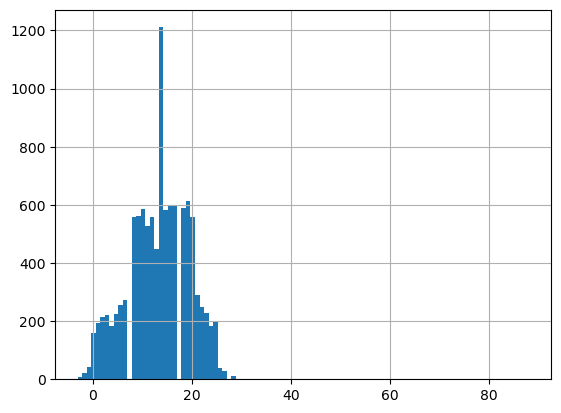

In [116]:
df.loc[df['num_of_delayed_payment'] < 100, 'num_of_delayed_payment'].hist(bins=100)

* `changed_credit_limit`, `num_credit_inquiries`, `amount_invested_monthly` y `monthly_balance`: Tienen menos del 3% de datos nulos, una cifra bastante menor. Por lo tanto, no se imputan estos valores.

* `credit_history_age`: Es una variable numérica continua que representa la edad de la historia de crédito de la persona. Los datos nulos se reemplazan con la media.

<Axes: >

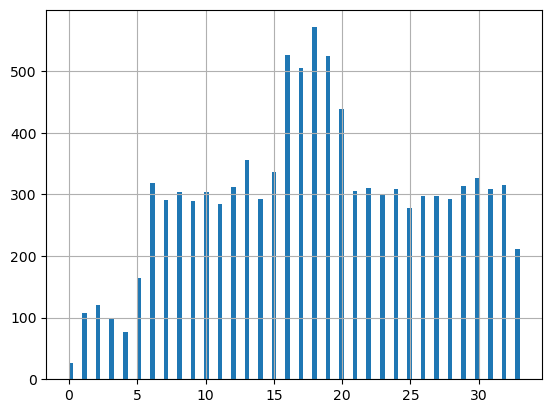

In [117]:
df['credit_history_age'].hist(bins = 100)

In [118]:
df['credit_history_age'] = df['credit_history_age'].fillna(df['credit_history_age'].mean())

<Axes: >

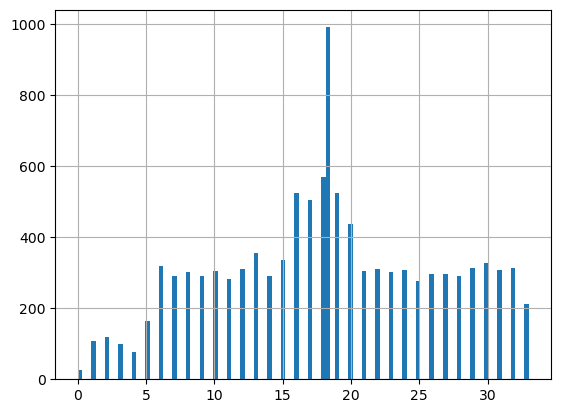

In [119]:
df['credit_history_age'].hist(bins = 100)

In [120]:
df.isna().any(axis=1).sum()/ df.shape[0]

0.0

Se eliminan las filas de datos nulos restantes.

In [121]:
df.dropna(inplace=True)

In [122]:
def tranform_nan(dataframe):

    df_result = dataframe.copy()

    # imputacion sobre monthly_inhand_salary
    df_result['monthly_inhand_salary'] = df_result['monthly_inhand_salary'].fillna(df_result['annual_income']/12)

    # imputacion num_of_delayed_payment
    df_result['num_of_delayed_payment'] = df_result['num_of_delayed_payment'].fillna(df_result['num_of_delayed_payment'].median())

    # imputacion credit_history_age
    df_result['credit_history_age'] = df_result['credit_history_age'].fillna(df_result['credit_history_age'].mean())

    # se eliminan el resto de filas con nulos
    # df_result.dropna(inplace=True)

    return df_result



## 4. Baseline
Se generan varios Pipeline que utilizan diferentes tipos de modelos de clasificación.

In [123]:
rs = 42

pipe_dummy = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', DummyClassifier(strategy='stratified', random_state=rs))
])

pipe_logit = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', LogisticRegression(random_state=rs))
])

pipe_knn = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', KNeighborsClassifier())
])

pipe_dtc = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', DecisionTreeClassifier(random_state=rs))
])

pipe_svc = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', SVC(random_state=rs))
])

pipe_rfc = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', RandomForestClassifier(random_state=rs))
])

pipe_lgbm = Pipeline([
    ('preprocesamiento', preprocessing_transformer),
    ('clf', ltb.LGBMClassifier(random_state=rs))
])

pipe_xgb = Pipeline([
    ('transform_nan', FunctionTransformer(tranform_nan)),
    ('preprocesamiento', preprocessing_transformer),
    ('clf', xgb.XGBClassifier(random_state=rs))
])




In [125]:
# Ajustes y predicciones
pipe_dummy.fit(X_train, y_train)
y_pred_dummy = pipe_dummy.predict(X_test)

pipe_logit.fit(X_train, y_train)
y_pred_logit = pipe_logit.predict(X_test)

# pipe_knn.fit(X_train, y_train)
# y_pred_knn = pipe_knn.predict(X_test)

pipe_dtc.fit(X_train, y_train)
y_pred_dtc = pipe_dtc.predict(X_test)

pipe_svc.fit(X_train, y_train)
y_pred_svc = pipe_svc.predict(X_test)

pipe_rfc.fit(X_train, y_train)
y_pred_rfc = pipe_rfc.predict(X_test)

pipe_lgbm.fit(X_train, y_train)
y_pred_lgbm = pipe_lgbm.predict(X_test)

pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)

c:\Users\carol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 2553, number of negative: 6328
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 8881, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287468 -> initscore=-0.907715
[LightGBM] [Info] Start training from score -0.907715


In [132]:
# Diccionario de metricas
metric_dict = {}

# Impresión de resultados
print('Dummy:\n')
print(classification_report(y_test, y_pred_dummy))
recall_dummy = recall_score(y_test, y_pred_dummy, average=None)[1]
metric_dict['Dummy'] = recall_dummy

print('\nLogistic Regression:\n')
print(classification_report(y_test, y_pred_logit))
recall_logit = recall_score(y_test, y_pred_logit, average=None)[1]
metric_dict["Logit"] = recall_logit

print('\nDecision Tree:\n')
print(classification_report(y_test, y_pred_dtc))
recall_dtc = recall_score(y_test, y_pred_dtc, average=None)[1]
metric_dict["DTC"] = recall_dtc

print('\nSupport Vector Machines:\n')
print(classification_report(y_test, y_pred_svc))
recall_svc = recall_score(y_test, y_pred_svc, average=None)[1]
metric_dict["SVC"] = recall_svc

print('\nRandom Forest:\n')
print(classification_report(y_test, y_pred_rfc))
recall_rfc = recall_score(y_test, y_pred_rfc, average=None)[1]
metric_dict["RFC"] = recall_rfc

print('\nLGBM:\n')
print(classification_report(y_test, y_pred_lgbm))
recall_lgbm = recall_score(y_test, y_pred_lgbm, average=None)[1]
metric_dict["LGBM"] = recall_lgbm

print('\nXGBoost:\n')
print(classification_report(y_test, y_pred_xgb))
recall_xgb = recall_score(y_test, y_pred_xgb, average=None)[1]
metric_dict["XGB"] = recall_xgb

Dummy:

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1582
           1       0.28      0.28      0.28       639

    accuracy                           0.58      2221
   macro avg       0.49      0.49      0.49      2221
weighted avg       0.59      0.58      0.59      2221


Logistic Regression:

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      1582
           1       0.63      0.31      0.42       639

    accuracy                           0.75      2221
   macro avg       0.70      0.62      0.63      2221
weighted avg       0.73      0.75      0.72      2221


Decision Tree:

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1582
           1       0.48      0.48      0.48       639

    accuracy                           0.70      2221
   macro avg       0.64      0.64      0.64      2221
weighted avg       0.70   

In [142]:
metric_df = pd.DataFrame(metric_dict.items(), columns=['Modelo', 'Recall'])
metric_df.sort_values(by=["Recall"], ascending=False)

,Modelo,Recall
5,LGBM,0.557121
6,XGB,0.521127
4,RFC,0.513302
2,DTC,0.477308
1,Logit,0.309859
3,SVC,0.303599
0,Dummy,0.281690
